In [3]:
# -*- coding: utf-8 -*-
from imutils import perspective
from skimage.filters import threshold_local  
import cv2  
import imutils  
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12, 8)

In [8]:
import pixellink

/Users/luoweimeng/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
util/plt.py:8: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/Users/luoweimeng/anaconda2/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/Users/luoweimeng/anaconda2/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/Users/luoweimeng/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py", li

Instructions for updating:
Please switch to tf.train.get_or_create_global_step
(768, 768)
train/ic17_whole/model.ckpt-200000
INFO:tensorflow:Restoring parameters from train/ic17_whole/model.ckpt-200000
('train/ic17_whole/model.ckpt-200000', 'Restore Success!')


In [43]:
pl = pixellink.pixelLinkDetector("/Users/luoweimeng/Documents/较符合要求的图片/9.jpg")
# 输出bounding boxes, (x1, y1, x2, y2, x3, y3, x4, y4) 顺时针方向
pl.detect()

0.7
0.8


[array([294, 104, 531, 104, 294, 143, 531, 143]),
 array([342, 152, 488, 152, 342, 167, 488, 167]),
 array([316, 180, 492, 180, 316, 211, 492, 211]),
 array([234, 232, 289, 232, 234, 255, 289, 255]),
 array([294, 244, 371, 244, 294, 259, 371, 259]),
 array([424, 244, 479, 244, 424, 263, 479, 263]),
 array([485, 252, 566, 252, 485, 267, 566, 267]),
 array([230, 268, 367, 268, 230, 291, 367, 291]),
 array([424, 276, 566, 276, 424, 299, 566, 299]),
 array([238, 300, 358, 300, 238, 319, 358, 319]),
 array([433, 312, 557, 312, 433, 327, 557, 327]),
 array([238, 328, 354, 328, 238, 347, 354, 347]),
 array([398, 331, 596, 340, 396, 359, 595, 368]),
 array([225, 356, 363, 356, 225, 383, 363, 383]),
 array([420, 368, 561, 368, 420, 395, 561, 395]),
 array([247, 388, 337, 388, 247, 407, 337, 407]),
 array([441, 400, 536, 400, 441, 419, 536, 419]),
 array([247, 420, 332, 420, 247, 435, 332, 435]),
 array([420, 424, 561, 424, 420, 455, 561, 455]),
 array([247, 448, 332, 448, 247, 467, 332, 467]),


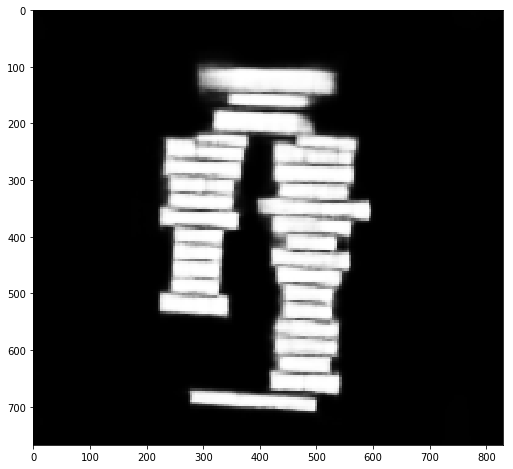

In [69]:
# 输出pixel score

pixel_score = pl.draw_pixel_score()
plt.imshow(pixel_score, cmap='gray')

In [98]:
pixel_score_new

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [100]:

_, pixel_score_new = cv2.threshold(pixel_score, 127,255,0)
contours = cv2.findContours(pixel_score_new.copy(),cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)

error: /Users/travis/build/skvark/opencv-python/opencv/modules/imgproc/src/contours.cpp:199: error: (-210) [Start]FindContours supports only CV_8UC1 images when mode != CV_RETR_FLOODFILL otherwise supports CV_32SC1 images only in function cvStartFindContours_Impl


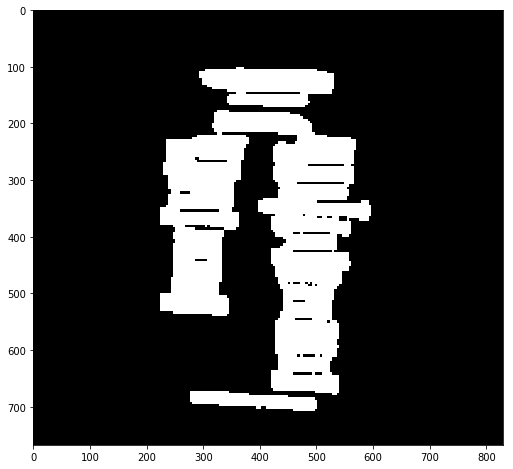

In [86]:
# 输出pixel score

plt.imshow(pixel_score_new, cmap='gray')
# cv2.findContours(pixel_score_new.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

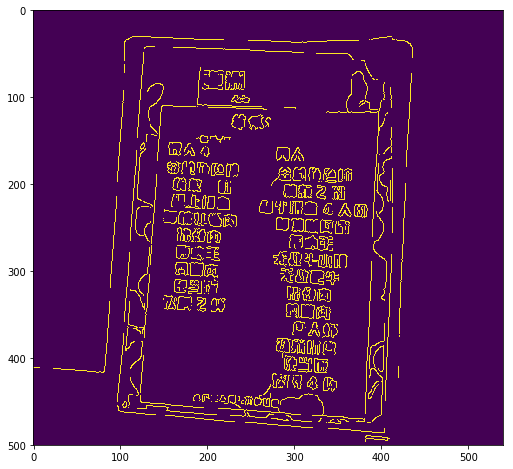

In [41]:
 # 边缘扫描  
# image = cv2.imread("/Users/chengcheng/Downloads/较符合要求的图片/13.jpg")
image = cv2.imread("/Users/luoweimeng/Documents/较符合要求的图片/9.jpg")

ratio = image.shape[0] / 500.0                                 # 比例  
orig = image.copy()  
image = imutils.resize(image, height = 500)  
 
# 灰度转换及边缘查找  
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (5, 5), 0)  
edged = cv2.Canny(gray, 75, 200)                               # 边缘检测  
plt.imshow(edged)

------> [[[402 385]]

 [[393 392]]

 [[391 398]]

 [[392 409]]

 [[399 415]]

 [[402 413]]]
------> [[[401 386]]

 [[403 388]]

 [[402 413]]

 [[399 415]]

 [[392 409]]

 [[391 398]]

 [[393 393]]]
------> [[[291 338]]

 [[291 352]]

 [[296 352]]

 [[291 339]]

 [[302 337]]

 [[302 353]]

 [[322 354]]

 [[323 339]]

 [[308 338]]

 [[306 353]]

 [[305 339]]]
------> [[[323 400]]

 [[323 415]]

 [[337 416]]

 [[338 401]]]
rect--> ((330.0000305175781, 408.0000305175781), (15.033294677734375, 15.033293724060059), -86.18592071533203)
screenCnt [[[323 400]]

 [[323 415]]

 [[337 416]]

 [[338 401]]]


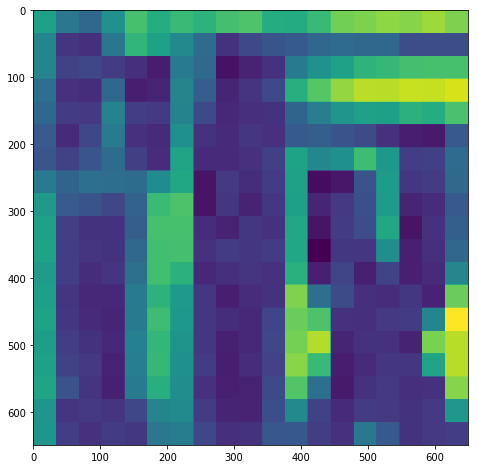

In [48]:
# 只保留轮廓  
cnts = cv2.findContours(edged.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE) #通过边缘图像找到轮廓
cnts = cnts[0] if imutils.is_cv2() else cnts[1]                # 用以区分OpenCV2.4和OpenCV3  
cnts = sorted(cnts, key = cv2.contourArea, reverse = True)[:5] # 保留前5个最大轮廓  

# print "cnts-->", type(cnts), len(cnts), cnts
screenCnt = None
for c in cnts:  
   peri = cv2.arcLength(c, True)  
   approx = cv2.approxPolyDP(c, 0.02 * peri, True)            # 轮廓点
   print '------>' , approx
   if len(approx) == 4:                                       # 表明找到四个轮廓点  
       screenCnt = approx  
       break

rect = cv2.minAreaRect(screenCnt)  #得到最小外接矩形的（中心(x,y), (宽,高), 旋转角度）
print "rect-->", rect
print 'screenCnt', screenCnt
imge=cv2.drawContours(orig.copy(),screenCnt,-1,(0,0,255),3) #画出轮廓
plt.imshow(imge)

# 转为鸟瞰图  
warped = perspective.four_point_transform(orig, screenCnt.reshape(4, 2) * ratio)  
warped = cv2.cvtColor(warped, cv2.COLOR_BGR2GRAY)              # 灰度转换  
# T = threshold_local(warped, 11, offset = 10, method = "gaussian")
# warped = (warped > T).astype("uint8") * 255

plt.imshow(imutils.resize(orig, height = 650))

plt.imshow(imutils.resize(warped, height = 650))


In [30]:
cnts

[array([[[452,  93]],
 
        [[451,  94]],
 
        [[418,  94]],
 
        [[417,  95]],
 
        [[375,  95]],
 
        [[374,  96]],
 
        [[373,  95]],
 
        [[372,  96]],
 
        [[336,  96]],
 
        [[335,  97]],
 
        [[234,  97]],
 
        [[233,  96]],
 
        [[232,  97]],
 
        [[221,  97]],
 
        [[220,  96]],
 
        [[219,  97]],
 
        [[186,  97]],
 
        [[185,  96]],
 
        [[184,  97]],
 
        [[181,  97]],
 
        [[180,  96]],
 
        [[159,  96]],
 
        [[158,  97]],
 
        [[157,  97]],
 
        [[156,  96]],
 
        [[155,  96]],
 
        [[154,  97]],
 
        [[143,  97]],
 
        [[142,  96]],
 
        [[140,  96]],
 
        [[139,  97]],
 
        [[131,  97]],
 
        [[130,  96]],
 
        [[ 61,  96]],
 
        [[ 60,  97]],
 
        [[ 61,  98]],
 
        [[ 60,  99]],
 
        [[ 60, 106]],
 
        [[ 59, 107]],
 
        [[ 59, 115]],
 
        [[ 58, 116]],
 
        [[ 58, 1

In [97]:
edged

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)